In [17]:
from src.models import Simulation, Strategy, Game
import numpy as np
import pandas as pd

In [18]:
class BenoulliProcess(Game):
    def __init__(self, title: str = "Bernoulli Process", p: float = 0.5):
        super().__init__(title)
        self.p = p

    def play_round(self, game_history):
        return 1 if np.random.rand() < self.p else -1
    
class FixedBettingStrategy(Strategy):
    def __init__(self,bet_amount: float, name: str = "Fixed Bet Strategy"):
        super().__init__(name)
        self.bet_amount = bet_amount

    def decide_bet(self, game_history):
        return self.bet_amount
    
class DoubleOnLossStrategy(Strategy):
    def __init__(self, base_bet: float, name: str = "Double On Loss Strategy"):
        super().__init__(name)
        self.base_bet = base_bet
        self.current_bet = base_bet

    def decide_bet(self, game_history):
        last = game_history.last_record()
        print("Last game record:", last)
        if not game_history.is_empty() and last["outcome"] == -1:
            self.current_bet *= 2
        else:
            self.current_bet = self.base_bet
        return self.current_bet
    
sim = Simulation(
    game=BenoulliProcess(p=0.5),
    strategies=[
        FixedBettingStrategy(bet_amount=100),
        DoubleOnLossStrategy(base_bet=50)
    ],
    max_bet=1000000,
    start_value=1000
)

results = sim.run(rounds=1000)

/home/desire/Desktop/Martingale/src/models.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.records = pd.concat([self.records, new_record], ignore_index=True)


Last game record: Series([], dtype: object)
Last game record: outcome        -1.0
bet            50.0
total_gain    950.0
Name: 0, dtype: float64
Last game record: outcome        -1.0
bet           100.0
total_gain    850.0
Name: 1, dtype: float64
Last game record: outcome        -1.0
bet           200.0
total_gain    650.0
Name: 2, dtype: float64
Last game record: outcome        -1.0
bet           400.0
total_gain    250.0
Name: 3, dtype: float64
Last game record: outcome          1.0
bet            800.0
total_gain    1050.0
Name: 4, dtype: float64
Last game record: outcome          1.0
bet             50.0
total_gain    1100.0
Name: 5, dtype: float64
Last game record: outcome         -1.0
bet             50.0
total_gain    1050.0
Name: 6, dtype: float64
Last game record: outcome        -1.0
bet           100.0
total_gain    950.0
Name: 7, dtype: float64
Last game record: outcome        -1.0
bet           200.0
total_gain    750.0
Name: 8, dtype: float64
Last game record: outcome    

/home/desire/Desktop/Martingale/src/models.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.records = pd.concat([self.records, new_record], ignore_index=True)


In [19]:
results["Fixed Bet Strategy"].compute_statistics()

{'total_rounds': 1000,
 'final_gain': np.float64(-3600.0),
 'average_bet': np.float64(100.0),
 'max_bet': np.float64(100.0),
 'min_bet': np.float64(100.0),
 'max_drawdown': np.float64(6300.0)}

In [20]:
result1 = results["Fixed Bet Strategy"]
result2 = results["Double On Loss Strategy"]

In [21]:
result1.history.describe()

,outcome,bet,total_gain
count,1000.000000,1000.0,1000.000000
mean,-0.046000,100.0,-797.200000
std,0.999441,0.0,1810.256664
min,-1.000000,100.0,-4000.000000
25%,-1.000000,100.0,-2600.000000
50%,-1.000000,100.0,-400.000000
75%,1.000000,100.0,800.000000
max,1.000000,100.0,2300.000000


In [22]:
result1.compute_statistics()

{'total_rounds': 1000,
 'final_gain': np.float64(-3600.0),
 'average_bet': np.float64(100.0),
 'max_bet': np.float64(100.0),
 'min_bet': np.float64(100.0),
 'max_drawdown': np.float64(6300.0)}

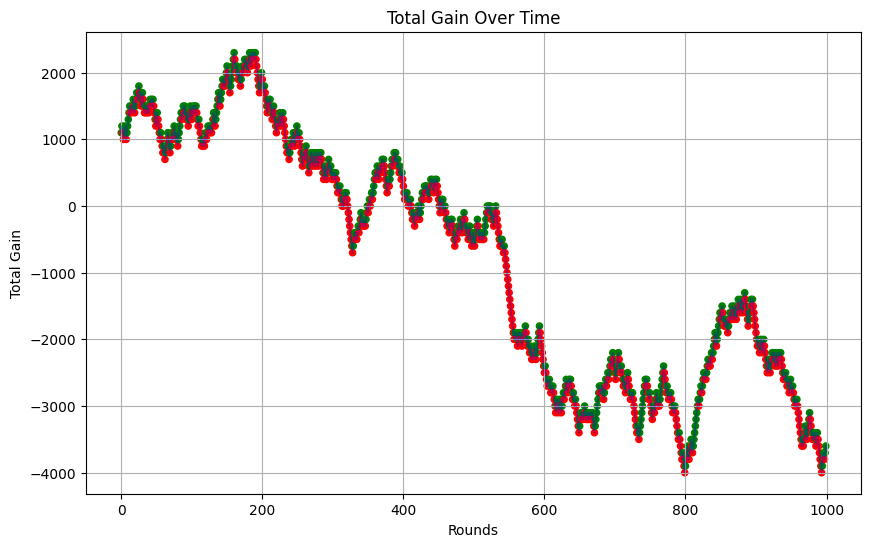

In [23]:
result1.plot_gain_over_time()

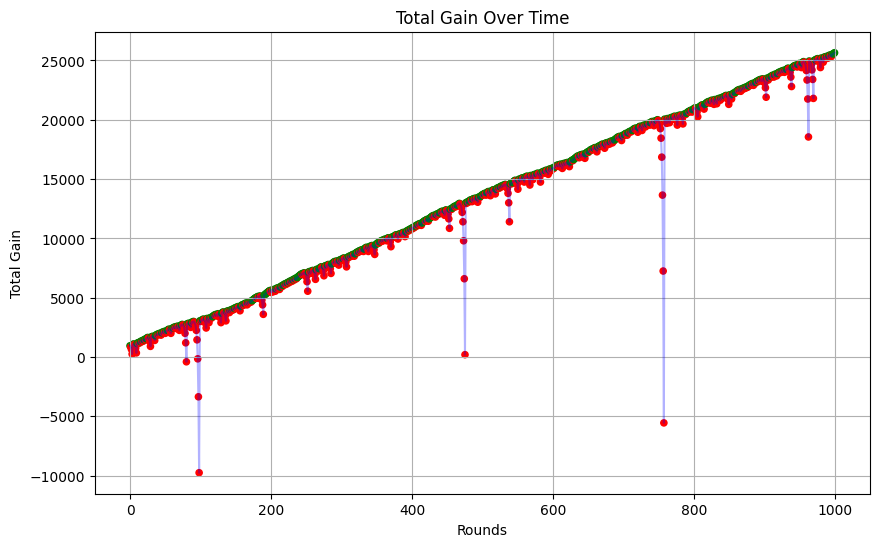

In [24]:
result2.plot_gain_over_time()